# Math  1376: Programming for Data Science
---

In [1]:
import numpy as np #We will use numpy in this lecture
import matplotlib.pyplot as plt
%matplotlib inline

## Module 04: Some useful applications of Modules 01-03
---

In this module, we will now pull together material across our first three modules to solve some practical problems. 

You may find it useful to review the notebooks in those modules beforehand or just simply open some of the notebooks to have their contents available to review as necessary. 

While there are a seemingly endless number of practical problems we can attempt to solve with what we have learned so far, we will focus on three ubiquitous problems in the computational sciences.

- Root-finding. (The content of Part (a) of this module.)
<br>

- Numerical integration. (The content of Part (b) of this module.)
<br>

- Optimization. (This content is pursued in the homework of this module.)
<br>

### A note about calculus concepts and interactive visualizations (i.e., widgets)
---

These topics are commonly studied as applications of calculus concepts. 
However, while we may make passing reference to certain calculus concepts, you do *not* need to know calculus to follow the narratives. (This, of course, is not to say that you should not seek to master calculus at some point.)
Our focus is on the *big picture ideas* and we use interactive graphics (powered by a widgets module) to help us explore these ideas.

## Learning Objectives for Part (a)

- Understand what a root-finding problem means and how they arise in practice.


- Apply different types of root-finding algorithms to various functions written as `lambda` Python functions.


- Create code that implements root-finding algorithms of different types.


- Create annotations and interactive widgets to enhance visualizations of data.


### Some larger "in situ" learning objectives (i.e., learning that will occur by design of activities)

While we are going to explore how to implement some of these algorithms as activities below, our learning objectives go beyond simple correct implementation. We will also consider what it means to do the following:

- *compare* and *analyze* different algorithms developed for solving the same generic problem;
<br>

- use this comparison to *choose* the "right" algorithm for solving a *specific* problem;
<br>

- create a module that encodes various algorithms and a *wrapper* function that automatically chooses which algorithm to apply based on the inputs.
<br>

Some of this is done in the notebook while other parts are left for homework.

## Notebook contents <a id='Contents'>

* <a href='#Root-finding'>Part (a): Root-finding</a>
<br>

    * <a href='#Introduction'>Part (a)(i): An introduction to concepts</a>
    <br>
    
    * <a href='#Bracketing'>Part (a)(ii): Bracketing methods</a>
    <br>
        
        * <a href='#activity-bisection'>Activity: Implementing the bisection algorithm</a>
        <br>
        
        * <a href='#activity-bisection-variant'>Activity: Implementing a bisection variant</a>
        <br>
        
        * <a href='#activity-bracketing-compare'>Activity: Comparing bracketing methods</a>
        <br>
        
    * <a href='#Iterative'> Part (a)(iii): "Iterative" methods </a>
    <br>
    
        * <a href='#activity-secant'>Activity: Implementing the secant algorithm</a>
        <br>
        
        * <a href='activity-linear-methods-compare'>Activity: Comparing secant to false point</a>
        <br>
    
    * <a href='#activity-summary'>Activity: Summary</a>

## Part (a): Root-finding <a id='Root-finding'>
---

**Expected time to completion: 6-9 hours**
    
<span style='background:rgba(255,255,0, 0.25); color:black'> Run the code cell below and click the "play" button to see the first recorded lecture associated with this notebook.</span>

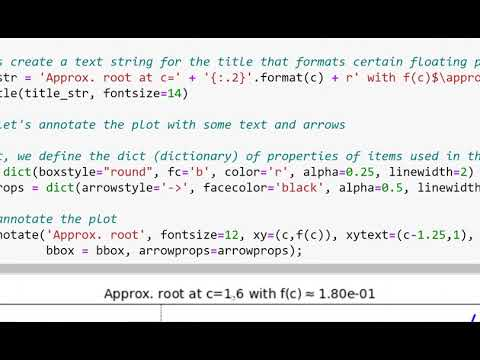

In [2]:
# 1. Running this cell with embed the short recorded lecture associated with this part of the notebook
# 2. Press on the "play" button to start the video.

from IPython.display import YouTubeVideo

YouTubeVideo('_kROMq3pDzA', width=800, height=300)

## Part (a)(i): An introduction to concepts <a id='Introduction'>

### What does root-finding mean?

Simply put, given $f(x)$, a root of the function is some point $x=c$ such that $f(c)=0$. 

In other words, the ***roots*** of a function are the *inputs* that make the *output* equal to zero. 

### lambda functions for simple examples

We only mentioned these briefly in 03-Lecture-part-b.ipynb in the context of list comprehensions, so you may want to review that quickly.

A lambda function is very useful in the context of this notebook, so we dive into them a bit more here. 

What is a `lambda` function? You can read quite a bit about such functions [here](https://www.w3schools.com/python/python_lambda.asp) or [here](https://realpython.com/python-lambda/).

<span style='background:rgba(255,0,255, 0.25); color:black'> ***Key Points:*** <span>

- The main takeaway is that if you have a simple type of "anonymous" function that you just need for a short period of time in your code, then a lambda function is probably right for you. It is *not* necessary to use these, but they are useful. 
<br>

- A generic use syntax we care about would look something like this:

  > ```f = lambda arguments : expression ```

Run the code cells below to see an example of a `lambda` function in the context of plotting the roots of a polynomial.

Pay attention to how we use these types of functions in this lecture. They are completely anonymous functions that we pass as arguments into algorithms so that we can study how the algorithms perform on different types of functions without having to formally declare/create the functions elsewhere in the code.
In other words, they are simply a matter of convenience.

In [3]:
f = lambda x : x**3 - x - 2  #defining f(x) = x^3-x-2

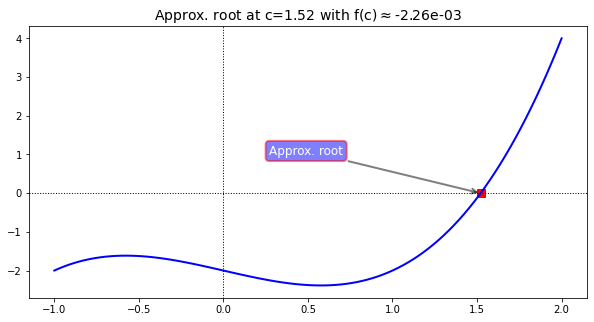

In [4]:
plt.figure(figsize=(10,5))

x = np.linspace(-1,2,100) # Create 100 uniformly spaced points between -1 and 2
plt.plot(x,f(x),'b',linewidth=2) #plot of function f vs x

# Let's add some axes to the plot
plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis

# Let's add the root to the plot using a scatter plot
c = 1.521 #approximate root
plt.scatter(c,f(c),s=70,c='r',marker='s') #plot approximate root

###########################################
## Now for some fancier plotting options ##
###########################################

# Let's create a text string for the title that formats certain floating point numbers
title_str = 'Approx. root at c=' + '{:.3}'.format(c) + r' with f(c)$\approx$' + '{:.2e}'.format(f(c))
plt.title(title_str, fontsize=14)

# Now let's annotate the plot with some text and arrows

# First, we define the dict (dictionary) of properties of items used in the annotation
bbox = dict(boxstyle="round", fc='b', color='r', alpha=0.5, linewidth=2) #This is the property dict for bounding box of text
arrowprops = dict(arrowstyle='->', color='k', alpha=.5, linewidth=2) #This is the property dict for the arrow

# Now annotate the plot
plt.annotate('Approx. root', fontsize=12, xy=(c,f(c)), xytext=(c-1.25,1), color='w',
             bbox = bbox, arrowprops=arrowprops);

***Of course, the above example just gives us more of the idea of the "what" but not the "why."***

### Why should we care about roots?

Is there anything particularly important about a function being zero? In general, the answer is no. However, it depends on the function and the goals of the problem/application for which the function models system behavior. 
The assignment discusses how root problems arise naturally in many optimization problems.
Below, we provide some simpler motivating examples.

<span style='background:rgba(255,0,255, 0.25); color:black'> ***Some motivating examples:*** <span>

- Suppose there are two launched projectiles with two height functions denoted by $h_1(t)$ and $h_2(t)$, and we are very interested when, or even *if*, there is a time where $h_1(t)=h_2(t)$. In other words, is there a time where the objects collide? This is an important question that arises in missile defense systems, satellite monitoring, and autonomous vehicle guidance systems. If we define $f(t)=h_1(t)-h_2(t)$, then we are interested in knowing whether or not $f(t)=0$. 
<br>

- Suppose $p(t)$ describes a model you develop for the price of a potential investment (it could be in a savings/money market account, stock, or mutual fund to name just a few). You are probably interested in knowing when your model predicts the price to reach a certain target value, $p_{target}$, so that you can develop certain financial plans/goals around this time frame (e.g., having enough for a down payment on a car or house, take a vacation, or retire). Defining $f(t)=p(t)-p_{target}$ means you are interested in determining when $f(t)=0$.

### And these root problems are solved how?

There are lots of algorithms that attempt to approximate the roots of a function, e.g., see https://en.wikipedia.org/wiki/Root-finding_algorithms. 

<span style='background:rgba(255,0,255, 0.25); color:black'> ***Key Points:*** <span>

- Most algorithms are *iterative*. (Meaning we need to write *loops* to implement them.)
<br>

- Some algorithms are very easy to implement. Some are more difficult. Generally, the easier something is to implement, the more restrictive the conditions are under which we expect it to produce anything meaningful. 

## Part (a)(ii): Bracketing methods <a id='Bracketing'>
---

<span style='background:rgba(255,255,0, 0.25); color:black'> Run the code cell below and click the "play" button to see the second recorded lecture associated with this notebook.</span>

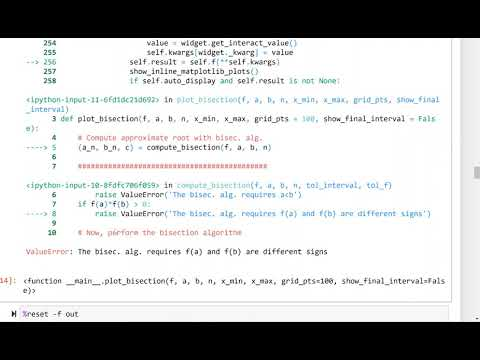

In [5]:
# 1. Running this cell with embed the short recorded lecture associated with this part of the notebook
# 2. Press on the "play" button to start the video.

from IPython.display import YouTubeVideo

YouTubeVideo('gvPYZdsLaBI', width=800, height=300)

## Bisection algorithm (https://en.wikipedia.org/wiki/Bisection_method)

---

The basic idea is best illustrated by an interactive demo and playing the video above.

***Recall that we use widgets to create the interactivity. Widgets are very useful for illustrating concepts and exploring ideas.***

In [6]:
# Usually place these at the top of a notebook if you know you are going to use widgets
# This cell only needs to be executed once
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<span style='background:rgba(0,255,255, 0.5); color:black'> Suggested activity:</span> 
If you really want to understand things, do the following:
- Update the docstring in `compute_bisection` to describe the (1) role of the various parameters, and (2) what variables (if any) the function returns.

- Add at least one doctest.

In [7]:
def compute_bisection(f, a, b, n=10, tol_interval=1e-5, tol_f=1e-8):
    '''
    This simple function applies up to n iterations of the 
    bisection algorithm
    '''
    
    # Let us first check the conditions to apply the bisection
    # algorithm are satisfied
    if a >= b:
        raise ValueError('The bisec. alg. requires a<b')
    if f(a)*f(b) > 0:
        raise ValueError('The bisec. alg. requires f(a) and f(b)' +\
                         'are different signs')
        
    # Now, perform the bisection algorithm
    current_iter = 0
    while current_iter < n:
        current_iter += 1
        
        # bisect the interval [a,b], i.e., compute mid-point
        c = (b+a)/2 
        
        # Check if c is an (approx.) root
        if np.abs(f(c)) < tol_f:
            break
        
        # Determine if a or b should be replaced with c
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
            
        # Check if dividing [a,b] in half made the interval 
        # too small to continue
        if (b-a) < tol_interval:
            break
        
    return (a, b, c) # Returns a tuple

In [8]:
# This uses the lambda function f previously defined
# as well as default values for three of the parameters
a, b, c = compute_bisection(f, 0, 2)

# Print the approximate root
print(c)

1.521484375


In [9]:
# We can also return the tuple of outputs as a single variable
bisec_results = compute_bisection(f, 0, 2)

# The output is a tuple
print(type(bisec_results))

# The length of the tuple
print(len(bisec_results))

# The last component of the tuple has the approx. root
print(bisec_results[-1]) 

<class 'tuple'>
3
1.521484375


In [10]:
# We could just ignore all the c value returned by the function as follows
_, _, c = compute_bisection(f, 0, 2)

print(c)

1.521484375


In [11]:
# OR, we could just return only the last value of the tuple
c = compute_bisection(f, 0, 2)[2]

print(c)

1.521484375


In [12]:
# If we did not know how many components were in the tuple, 
# BUT we did know that the last one had the value we were after, 
# then we could use the following line of code
c = compute_bisection(f, 0, 2)[-1]

print(c)

1.521484375


**Now let's add some interactivity.** Watch what if you choose `b` (or `a`) such that `f(b)` and `f(a)` have the same sign. But, how do know when that will happen? (*Hint*: refer to the plot.)

In [13]:
interact(compute_bisection, 
         f = fixed(f),
         a = widgets.FloatSlider(value=0, min=-1, max=2, step=0.1), 
         b = widgets.FloatSlider(value=2, min=0, max=3, step=0.1),
         n = widgets.IntSlider(value=10, min=1, max=100, step=1),
         tol_interval = fixed(1e-5),
         tol_f = fixed(1e-8))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-1.0), FloatSlider(value=2.0, descr…

<function __main__.compute_bisection(f, a, b, n=10, tol_interval=1e-05, tol_f=1e-08)>

**We can easily play with other lambda functions.**

***But,*** what is going on with all of the errors as we try different values of `b` in the code below for the lambda function used?

In [14]:
interact(compute_bisection, 
         f = fixed(lambda x: np.sin(x**3 - x - 2)),
         a = widgets.FloatSlider(value=0, min=-1, max=2, step=0.1), 
         b = widgets.FloatSlider(value=2, min=0, max=3, step=0.1),
         n = widgets.IntSlider(value=10, min=1, max=100, step=1),
         tol_interval = fixed(1e-5),
         tol_f = fixed(1e-8))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-1.0), FloatSlider(value=2.0, descr…

<function __main__.compute_bisection(f, a, b, n=10, tol_interval=1e-05, tol_f=1e-08)>

**Let's plot the lambda function from the previous code cell to see what is going on.**

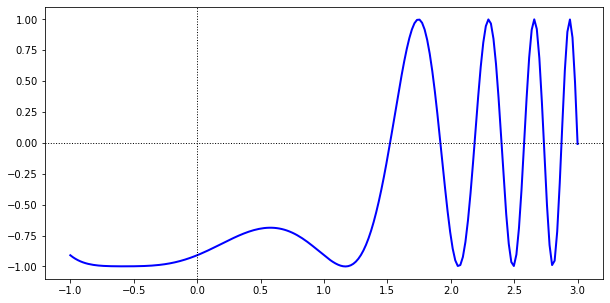

In [15]:
f_new = lambda x: np.sin(x**3 - x - 2)

x = np.linspace(-1,3,200)

plt.figure(figsize=(10,5))
plt.plot(x,f_new(x), 'b', linewidth=2) #plot of function f
plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis

**Let's plot a different function that never crosses the x-axis.**

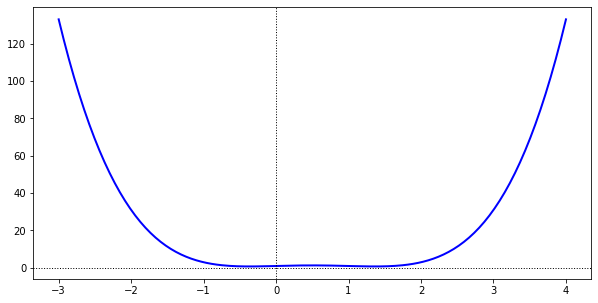

In [16]:
f_new = lambda x: x**4 - 2*x**3 + x + 1

x = np.linspace(-3,4,200)

plt.figure(figsize=(10,5))
plt.plot(x,f_new(x), 'b', linewidth=2) #plot of function f
plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis

**We HOPE to get an error when we try to find a root to the function above.**

Remember, `compute_bisection` **is working PROPERLY if it gives us an error in this case.**

In [17]:
interact(compute_bisection, 
         f = fixed(f_new),
         a = widgets.FloatSlider(value=0, min=-1, max=2, step=0.1), 
         b = widgets.FloatSlider(value=2, min=0, max=3, step=0.1),
         n = widgets.IntSlider(value=10, min=1, max=100, step=1),
         tol_interval = fixed(1e-5),
         tol_f = fixed(1e-8))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-1.0), FloatSlider(value=2.0, descr…

<function __main__.compute_bisection(f, a, b, n=10, tol_interval=1e-05, tol_f=1e-08)>

***What is the lesson here?*** 

Plots are *really* useful and we should often do some initial "grunt" work on examining the problem we are asked to solve to make sure that we actually set it up correctly. 

The `compute_bisection` was *not* failing just because it output errors. It was functioning just as it should. We gave it *bad* choices of `a` and `b` as the default values in the widget. Simply looking at the plot would have revealed that to us right away. 

While we may not always be able to plot a function for many reasons (e.g., it takes too long to evaluate the hundreds to thousands of times necessary to make a reasonable looking plot, the dimension of the input space is simply too high to properly visualize, etc.), **we should always try to visualize the data** associated with a problem *somehow* and in *someway* to orient ourselves properly on the problem.

With this in mind, we create a plotting function that *wraps* around the `compute_bisection` algorithm to add some illustration to the process. **Read the comments in the code cell below.**

In [18]:
# This cell creates a plotting function that we 
# then use widgets to interact with

def plot_bisection(f, a, b, n, x_min, x_max, grid_pts = 100, show_final_interval = False):
    # Compute approximate root with bisec. alg. 
    (a_n, b_n, c) = compute_bisection(f, a, b, n)
    
    #############################################################
    # I cannot emphasize enough that the whole of the scientific
    # computation for approximating the root of f occurs in the 
    # single line of code above that calls the separate function
    # compute_bisection.
    #############################################################
    
    ###############################################################
    # Everything below is just to make fancy illustrative plots of 
    # the results. Read through it carefully. Add/edit comments
    # as you do to make sure you understand what each line of code
    # is doing, but keep in mind that all the scientific computation
    # was already done above. We often put significant effort into
    # visualizing results so that we can properly "tell the story"
    # of the solution.
    ################################################################
    fig = plt.figure(figsize=(10,5))
    x = np.linspace(x_min, x_max, grid_pts)
    
    # First, plot function and axes
    plt.plot(x,f(x),'b',linewidth=2) #plot of function f
    plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    
    # Title information
    title_str = 'Approx. root is ' + '{:.6}'.format(c) + '. Use this to update interval [a,b].'
    plt.title(title_str, fontsize=14)
    
    # Create a dict (dictionary) of properties of items used in annotations
    bbox_pt = dict(boxstyle='round', fc='0.9')
    bbox_text = dict(boxstyle="round", fc='b', color='r', alpha=0.25, linewidth=2) 
    arrowprops = dict(arrowstyle='->', facecolor='black', alpha=0.5, linewidth=2) 
    y_min, y_max = plt.ylim() #get min and max y-values from plot to offset annotations
    y_range = y_max - y_min
    x_range = x_max - x_min
    
    # Now plot relevant points and annotate
    
    # First annotate parts of the plot involving the points a and b
    if show_final_interval:
        plt.scatter(a_n,f(a_n),s=70,c='k')
        
        plt.annotate(r'$(a_n,f(a_n))$', fontsize=12, xy=(a_n,f(a_n)), xytext=(a_n+0.2*x_range,f(a_n)-0.35*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
        
        plt.scatter(b_n,f(b_n),s=70,c='k')
        
        plt.annotate(r'$(b_n,f(b_n))$', fontsize=12, xy=(b_n,f(b_n)), xytext=(b_n+0.2*x_range,f(b_n)-0.35*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
        
    else:
        plt.scatter(a,f(a),s=70,c='k')
        
        plt.annotate(r'$(a,f(a))$', fontsize=12, xy=(a,f(a)), xytext=(a+0.1*x_range,f(a)-0.25*y_range),
                     bbox=bbox_pt, arrowprops=arrowprops)
        
        plt.scatter(b,f(b),s=70,c='k')
        
        plt.annotate(r'$(b,f(b))$', fontsize=12, xy=(b,f(b)), xytext=(b+0.1*x_range,f(b)-0.25*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)

    # Now annotate the part of the plot involving the approximate root c    
    plt.scatter(c,f(c),s=70,c='r')
    
    plt.annotate('Approx. root\nfrom ' + str(n) + '\nstep(s) of bisec.\nalgorithm', fontsize=12, xy=(c,f(c)), 
                     xytext=(c-0.2*x_range,f(c)+0.25*y_range), color='w',
                     bbox = bbox_text, arrowprops=arrowprops)
    
    plt.annotate(r'$(c,f(c))$', fontsize=12, xy=(c,f(c)), xytext=(c+0.1*x_range,f(c)-0.25*y_range),
                 bbox=bbox_pt, arrowprops=arrowprops)
  

In [19]:
# This magic command below with help "flush" outputs to keep memory sizes small if this cell is repeatedly executed
%reset -f out

interact(plot_bisection, 
         f = widgets.fixed(lambda x: x**3-x-2),
         a = widgets.FloatSlider(value=0.5, min=-1, max=1.52, step=0.01),
         b = widgets.FloatSlider(value=1.75, min=1.53, max=2, step=0.01),
         n = widgets.IntSlider(value=1, min=1, max=20),
         x_min = widgets.fixed(-1),
         x_max = widgets.fixed(2),
         grid_pts = widgets.fixed(100),
         show_final_interval = widgets.Checkbox(False))

Flushing output cache (7 entries)


interactive(children=(FloatSlider(value=0.5, description='a', max=1.52, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_bisection(f, a, b, n, x_min, x_max, grid_pts=100, show_final_interval=False)>

In [20]:
%reset -f out

interact(plot_bisection, 
         f = widgets.fixed(lambda x: np.sin(x**3-x-2)),
         a = widgets.FloatSlider(value=0.5, min=-1, max=1.52, step=0.01),
         b = widgets.FloatSlider(value=1.75, min=1.53, max=2, step=0.01),
         n = widgets.IntSlider(value=1, min=1, max=20),
         x_min = widgets.fixed(0),
         x_max = widgets.fixed(3),
         grid_pts = widgets.fixed(1000),
         show_final_interval = widgets.Checkbox(False))

Flushing output cache (1 entries)


interactive(children=(FloatSlider(value=0.5, description='a', max=1.52, min=-1.0, step=0.01), FloatSlider(valu…

<function __main__.plot_bisection(f, a, b, n, x_min, x_max, grid_pts=100, show_final_interval=False)>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Playing with the bisection algorithm</span><a id='activity-bisection'>

**Note 1**: You may want to create additional code cells below as you work your way through this activity.
    
**Note 2**: You may need to adjust the `a`, `b`, and parameters used for plotting (e.g., `xmin` and `xmax`) in order to capture the root for the functions you are playing with. Suppose the root is $100$, then you need to setup the problem and any associated plots around this value to get things to work properly. 
    
**Note 3**: It is okay to show examples that produce errors. This is in fact *encouraged* as long as you explain the errors. But, you should also show results that did not produce errors.

**In this activity, you should do the following (by the way, "some" always means at least two):**    
    
- Test the `plot_bisection` function on **some** `lambda` functions of your choosing **with and without widgets** for interactivity.
<br><br>

- Notice that `plot_bisection` does not have `tol_interval` or `tol_f` as parameters. When it calls `compute_bisection`, it is simply relying upon default values for these parameters. 
    
  **Create an `improved_plot_bisection` function that allows for all of the parameters in the `compute_bisection` function to be set by the user.**
<br><br>

- Test your `improved_plot_bisection` function on **some** `lambda` functions of your choosing both **with and without widgets** where you show results for different choices of these new parameters. 
    
   **You should use a FloatLogSlider for the tolerance parameters** since we often vary such tolerance parameters by orders of magnitude when we are testing out an algorithm.

<hr style="border:5px solid cyan"> </hr>

## A bisection variant (https://en.wikipedia.org/wiki/Regula_falsi)

The basic idea of *regula falsi* (i.e., the false position method) is quite simple. It follows 3 steps starting with an initial guess of an interval $[a,b]$ that may contain a root. 

1. Make a straight line between $(a,f(a))$ and $(b,f(b))$. 

2. Compute the $x$-intercept of this line and call that point $c$. 

3. Compute $f(c)$ and compare the sign to $f(a)$ (or $f(b)$) and update the interval to either $[a,c]$ or $[c,b]$ depending on the result of this comparison.

Thus, this is just a variant of the bisection algorithm. The fundamental difference is that instead of using the midpoint of the interval $[a,b]$ as the guess for the root $c$, we use *interpolation* to approximate the function with a simple function (a line) for which it is easy to determine the root. The exact root of this approximating function is then an approximate root of the exact function.

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Implementing a bisection variant</span><a id='activity-bisection-variant'>

**The same three notes as the previous activity also apply here.**

- Create a function `compute_false` that performs the false position method. **Make sure it tests that the conditions are appropriate for running this algorithm.** While not required, it is highly suggested that you also put in a useful docstring and doctests for this function. 
    
    *Hint*: You can do this by copying/pasting the `compute_bisection` function below, editing its name, and editing the single line of code involved with computing `c` (the wiki article tells you exactly what the value of `c` should be in the false position algorithm). You should also edit some of the code comments and the docstring.
<br>

- Test your `compute_false` code on some `lambda` functions with and without widgets. 
<br>

- Create a new function `plot_false` based on the `plot_bisection` function above to visualize the output of the false position method using widgets. 
    
  If you want to get *really* fancy, then try to plot the "last" line used to approximate the root. This is *not* required, but it is also not that difficult. You may want to try that after viewing the secant method plots in the next part of this notebook.
<br>

- Visualize results with some `lambda` functions with and without widgets. 




<hr style="border:5px solid cyan"> </hr>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Comparing bracketing methods</span><a id='activity-bracketing-compare'>

In computational and data science, we often must *choose* between implementing competing algorithms that solve the same problem in different ways. An important lesson is that if two or more algorithms exist to solve a problem, then there will be cases where one is preferable to the other. The question then becomes, which should you apply for a particular problem?   
    
- Use a mixture of markdown and code cells below to compare the bisection algorithm and false position method. 

  You may find the wiki articles useful to reference here as well as doing some searching on Google (or your favorite search engine). 

  Describe and implement problems where one method seemingly does better than another (e.g., what happens if the function is approximately linear near its root? what happens if the function is very "flat" near its root?)? Can you explain why that is happening? When would you consider using one method over another? What questions about these methods and comparing them seem worth exploring to you? This is intentionally left as open as possible for you to pursue what you think are intriguing questions to pose, research, and answer.

<hr style="border:5px solid cyan"> </hr>

## Part (a)(iii) "Iterative" methods <a id='Iterative'>
---
    
<span style='background:rgba(255,255,0, 0.25); color:black'> Run the code cell below and click the "play" button to see the third recorded lecture associated with this notebook.</span>

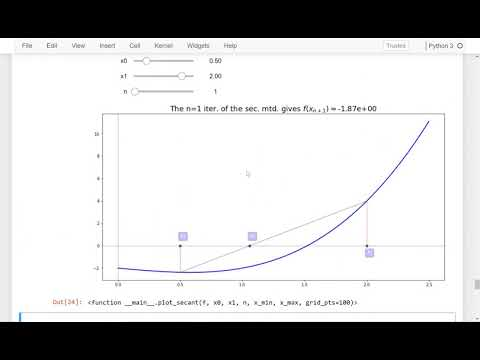

In [21]:
# 1. Running this cell with embed the short recorded lecture associated with this part of the notebook
# 2. Press on the "play" button to start the video.

from IPython.display import YouTubeVideo

YouTubeVideo('F-RLSHmC69o', width=800, height=300)

Iterative methods in root-finding problems generally refer to approaches that require an *initial guess of the root* instead of an initial interval/set containing the root. 
These methods generally rely on defining an *auxiliary* function (i.e., an approximation to the function) that is constructed at the current guess in order to form the next "best" guess at the root of the true function. 


I imagine the incredulity you must feel. After all, weren't the above methods iterative?
Well, yes they were in a very technical sense that they implement loops. 
In fact, the false-point method somewhat hints at the basic idea of these methods and looks similar to the *secant* method.
The difference is that bracketing methods also require a description of a set that contains the root you are looking for, which is significantly more information to specify at the start of a problem than just a single initial guess at the root.

One of the things you will need to consider, and which the instructions for the previous activity above hints at, is why some methods may be preferred to others in various scenarios. 

## The secant method (https://en.wikipedia.org/wiki/Secant_method)

This is perhaps best explained via an interactive demo and playing the video above. 

The wiki article actually includes Python code on this simple algorithm, which we copy below before the demo.

<span style='background:rgba(255,0,255, 0.25); color:black'> ***Good questions to keep in mind:*** <span>

- Can you see where this code can immediately have some difficulty? 
<br>

- What would be a good initial check to ensure that the code does not "crash"? 
<br>

    - Should a similar check be done at the end of each iteration? 

In [22]:
# Copied/edited from the wiki article
def secant_method(f, x0, x1, n):
    """Return the root calculated using the secant method."""
    for i in range(n):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
    return x2

In [23]:
# Copied and edited from the wiki article for demo purposes.
# We keep track of the iterative results (approx. roots and
# the function values of these approx. roots) by appending
# to a list so that we can (1) examine all the results, and 
# (2) create some fancy plots.
def secant_method_4_demo(f, x0, x1, n):
    """Return the root calculated using the secant method."""
    xs = [x0, x1]
    fs = [f(x0), f(x1)]
    for i in range(n):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        x0, x1 = x1, x2
        xs.append(x2)
        fs.append(f(x2))
    return xs, fs

**The most difficult thing to understand in the code below is how the `n` secant lines are plotted. Students should try to comment those lines and make sense of how that is working.**

In [24]:
def plot_secant(f, x0, x1, n,  x_min, x_max, grid_pts = 100):
    # Perform the secant method
    xs, fs = secant_method_4_demo(f, x0, x1, n)
    
    ############################################
    # Everything below this line involves making plots of the results 
    ############################################
    fig = plt.figure(figsize=(15,7.5))
    x = np.linspace(x_min,x_max,grid_pts)
    
    # Plot function and axes
    plt.plot(x,f(x),'b',linewidth=2) #plot of function f
    plt.axvline(0, linewidth=1, linestyle=':', c='k') #plot typical y-axis
    plt.axhline(0, linewidth=1, linestyle=':', c='k') #plot typical x-axis
    
    # Title information
    title_str = 'The n=' + str(n) + r' iter. of the sec. mtd. gives $f(x_{n+1})\approx$' + '{:.2e}'.format(fs[-1])
    plt.title(title_str, fontsize=18)
    
    # Plot all the n secant lines
    for i in range(n):
        min_idx = np.argmin(xs[i:i+3])
        max_idx = np.argmax(xs[i:i+3])
        if (min_idx != 2) and (max_idx != 2):
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [fs[i:i+3][min_idx], fs[i:i+3][max_idx]],
                     'k', linewidth=1, alpha=0.5)
        elif min_idx == 2:
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [0, fs[i:i+3][max_idx]],
                     'k', linewidth=1, alpha=0.5)
        else:
            plt.plot([xs[i:i+3][min_idx], xs[i:i+3][max_idx]], 
                     [fs[i:i+3][min_idx], 0],
                     'k', linewidth=1, alpha=0.5)
            
    # Make clear what the final interval is        
    plt.plot([xs[i], xs[i]], [0, fs[i]], 'r', linewidth=1, alpha=0.5)
    plt.plot([xs[i+1], xs[i+1]], [0, fs[i+1]], 'r', linewidth=1, alpha=0.5)    
    plt.scatter(np.array(xs),0*np.array(xs))
    
    # Annotate relevant points in the plot
    bbox = dict(boxstyle="round", fc='b', color='r', alpha=0.25, linewidth=2)
    y_min, y_max = plt.ylim() #get min and max y-values from plot to offset annotations
    y_range = y_max - y_min
    for i in range(n+2):
        if fs[i] < 0:
            plt.annotate(r'$x_' + str(i) + '$', fontsize=12, xy=(xs[i],y_range*0.05), color='w', bbox = bbox)
        else:
            plt.annotate(r'$x_' + str(i) + '$', fontsize=12, xy=(xs[i],-y_range*0.05), color='w', bbox = bbox)

In [25]:
interact(plot_secant,
         f = widgets.fixed(lambda x: x**3-x-2),
         x0 = widgets.FloatSlider(value=0.5, min=0, max=2.5, step=0.01),
         x1 = widgets.FloatSlider(value=2, min=0, max=2.5, step=0.01),
         n = widgets.IntSlider(value=1, min=1, max=10),
         x_min = widgets.fixed(0),
         x_max = widgets.fixed(2.5),
         grid_pts = widgets.fixed(1000))

interactive(children=(FloatSlider(value=0.5, description='x0', max=2.5, step=0.01), FloatSlider(value=2.0, des…

<function __main__.plot_secant(f, x0, x1, n, x_min, x_max, grid_pts=100)>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Improving the secant algorithm</span><a id='activity-secant'>

The same notes as the first two activities apply here.

- Create a `my_secant` function that is *improved* from what is implemented in `secant_method_4_demo` in the sense that it checks for and avoids any potential errors (e.g., division by zero?) that may occur both before any computation takes place and also during runtime. 
<br>

- Create a `my_plot_secant` based on the `plot_secant` above that utilizes this `my_secant` instead of `secant_method_4_demo`.
<br>
    
- Test your code on some `lambda` functions and using the interact widget on your `my_plot_secant` function.

<hr style="border:5px solid cyan"> </hr>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Comparing secant to false position</span><a id='activity-linear-methods-compare'>

- Use a mixture of code and markdown cells to compare the secant and false position methods across a variety of `lambda` functions. 

  You may find the wiki articles useful to reference here as well as doing some searching on Google or your favorite search engine. 

  Can you describe and implement problems where one method seemingly does better than another? Can you explain why that is happening? When would you consider using one method over another? What questions about these methods and comparing them seem worth exploring to you? This is intentionally left as open as possible for you to pursue what you think are intriguing questions to pose, research, and answer.

<hr style="border:5px solid cyan"> </hr>

<hr style="border:5px solid cyan"> </hr>

## <span style='background:rgba(0,255,255, 0.5); color:black'>Activity: Summary</span> <a id='activity-summary'/>

Summarize some of the key takeaways/points from this notebook in a list below and prepare a few code examples related to these takeaways/points in the code cells below. You need to have at least one example for each of your summary points and you need at least three summary points.

In this notebook, we have seen the following:

- [Your summary point 1 goes here]




- [Your summary point 2 goes here]




- [Your summary point 3 goes here]

<hr style="border:5px solid cyan"> </hr>

### <a href='#Contents'>Click here to return to Notebook Contents</a>